## US Accidents EDA 
##### - Data Source - Kaggle - US accidents Data (2016 - 21) - 2.8 Million Records
### Overview of Data
##### - Info about accidents
##### - this doesn't contain data about 'New York'
### Usage 
##### - To Prevent Accidents

##### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Reading Dataset

In [2]:
usa_data = pd.read_csv(r'C:\Users\acer\US_Accidents_Dec21_updated.csv')
usa_data.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


In [3]:
usa_data.shape

(2845342, 47)

##### Data preparation & Cleaning

In [4]:
usa_data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
usa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

##### Summary of the Data

In [6]:
usa_data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


##### Checking For Numeric columns in the data

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = usa_data.select_dtypes(include = numerics)
len(numeric_df.columns)

14

##### Checking For Null Values

In [8]:
missing_data_percentage = usa_data.isna().sum().sort_values(ascending = False) / len(usa_data)
missing_data_percentage

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Astronomical_Twilight    1.007612e-03
Sunrise_Sunset           1.007612e-03
Civil_Twilight           1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
Distance(mi)             0.000000e+00
Side                     0.000000e+00
Description              0.000000e+00
Bump                     0.000000e+00
County                   0.000000e+00
End_Lat                  0.000000e+00
Start_Lng   

##### Keeping non zero percentages

In [9]:
mp_df = missing_data_percentage[missing_data_percentage != 0]
mp_df

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Astronomical_Twilight    1.007612e-03
Sunrise_Sunset           1.007612e-03
Civil_Twilight           1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

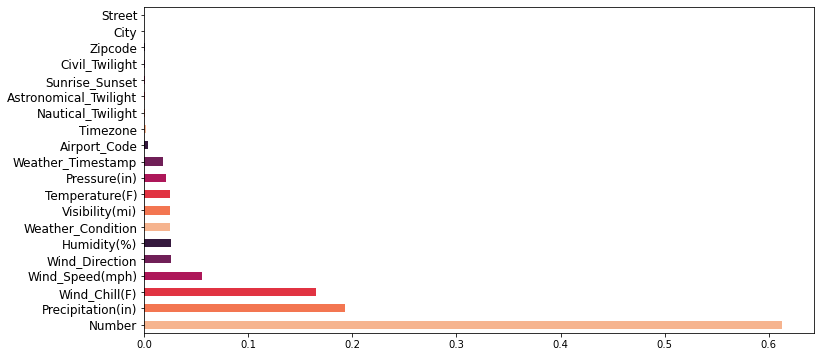

In [10]:
mp_df.plot(kind = 'barh',figsize=(12,6), color= sns.color_palette("rocket_r"))
plt.yticks(size=12)
plt.show()

##### Dropping Null Values

In [11]:
usa_data.dropna(inplace = True)

In [12]:
usa_data.isnull().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

### Exploratory Analysis & Visualization

In [13]:
usa_data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

##### Columns to analyse
##### 1. City
##### 2. Start Time
##### 3. Start Lat, Start Lng
##### 4. Temperature
##### 5. Weather Conditions

### City

In [14]:
cities = usa_data.City.unique()
len(cities)

8504

In [15]:
cities_by_accident = usa_data.City.value_counts()
cities_by_accident

Miami             67276
Orlando           37644
Los Angeles       20194
Houston           18923
Charlotte         16044
                  ...  
East Patchogue        1
Florham Park          1
Stockdale             1
Otego                 1
Irons                 1
Name: City, Length: 8504, dtype: int64

In [16]:
cities_by_accident[:10]

Miami          67276
Orlando        37644
Los Angeles    20194
Houston        18923
Charlotte      16044
Raleigh        15207
Dallas         14199
Baton Rouge    10619
Austin         10590
Tucson          9292
Name: City, dtype: int64

In [17]:
##### New York is one of the most populated city although it's not even present in the top 10 count of accidents.
##### Checking if New York does exist in the dataset

In [18]:
'New York' in usa_data.City

False

##### Top 20 Cities by Accident

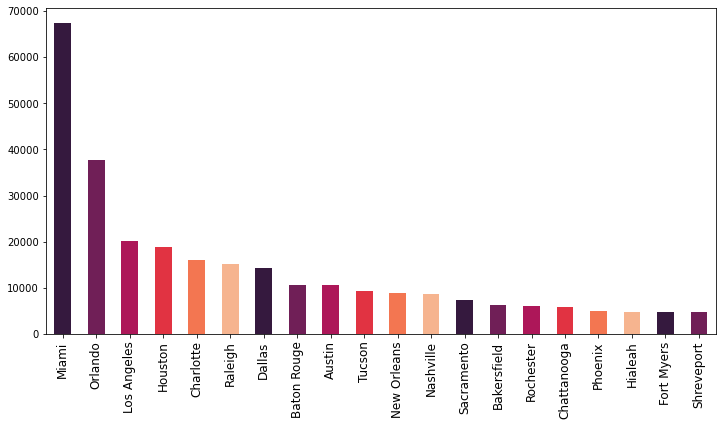

In [19]:
cities_by_accident[:20].plot(kind = 'bar', figsize=(12,6), color= sns.color_palette("rocket"))
plt.xticks(size=12)
plt.show()

In [20]:
import seaborn as sns
sns.set_style("darkgrid")

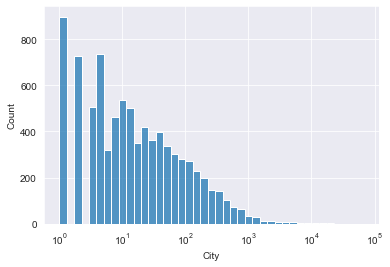

In [21]:
sns.histplot(cities_by_accident, log_scale = True)
plt.show()

In [22]:
one_df = cities_by_accident[cities_by_accident == 1]
one_df

Shell             1
LA Place          1
North Baldwin     1
Otter Lake        1
Chilhowie         1
                 ..
East Patchogue    1
Florham Park      1
Stockdale         1
Otego             1
Irons             1
Name: City, Length: 898, dtype: int64

In [23]:
high_accident_cities = cities_by_accident[cities_by_accident >= 1000]
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [24]:
len(high_accident_cities) / len(cities)

0.013640639698965193

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


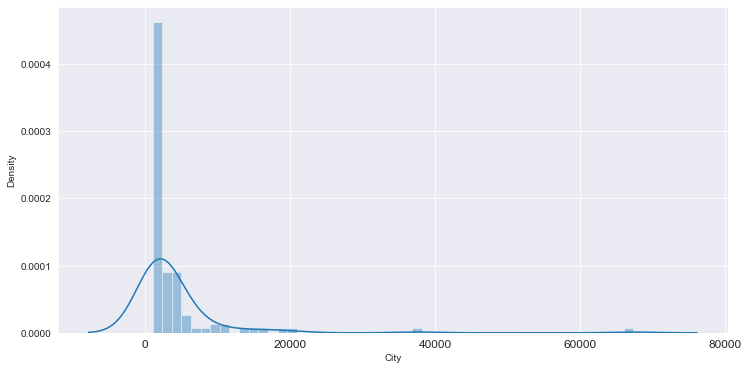

In [25]:
plt.figure(figsize=(12, 6))
sns.distplot(high_accident_cities)
plt.xticks(size=12)
plt.show()

### Start Time

In [26]:
usa_data.Start_Time

42         2016-02-09 18:20:58
43         2016-02-09 18:20:58
47         2016-02-10 06:18:49
50         2016-02-10 08:35:27
66         2016-02-10 12:54:39
                  ...         
2845298    2019-08-23 16:19:21
2845302    2019-08-23 17:25:12
2845303    2019-08-23 17:25:12
2845304    2019-08-23 01:16:01
2845307    2019-08-23 10:32:30
Name: Start_Time, Length: 943318, dtype: object

In [27]:
usa_data.Start_Time = pd.to_datetime(usa_data.Start_Time)
usa_data.Start_Time[0:5]

42   2016-02-09 18:20:58
43   2016-02-09 18:20:58
47   2016-02-10 06:18:49
50   2016-02-10 08:35:27
66   2016-02-10 12:54:39
Name: Start_Time, dtype: datetime64[ns]

In [28]:
usa_data.Start_Time[43].hour

18

In [29]:
usa_data.Start_Time.dt.hour

42         18
43         18
47          6
50          8
66         12
           ..
2845298    16
2845302    17
2845303    17
2845304     1
2845307    10
Name: Start_Time, Length: 943318, dtype: int64

##### Distribution of accidents by hour

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


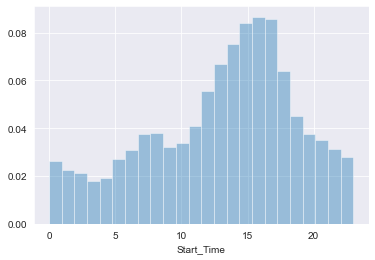

In [30]:
sns.distplot(usa_data.Start_Time.dt.hour, bins = 24, norm_hist = True, kde = False)
plt.show()

##### Distribution of accidents by week

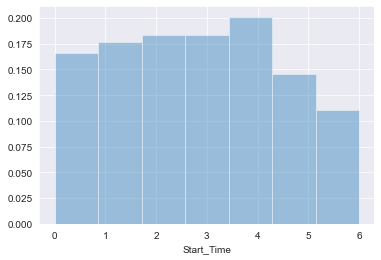

In [32]:
sns.distplot(usa_data.Start_Time.dt.dayofweek, bins = 7, norm_hist = True, kde = False)
plt.show()

##### Distribution of accidents by hour on Sundays

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


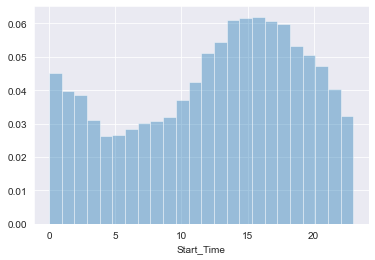

In [35]:
sundays_start_time = usa_data.Start_Time[usa_data.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins = 24, norm_hist = True, kde = False)
plt.show()


##### Distribution of accidents by hour on Mondays

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


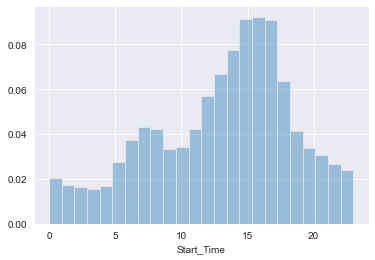

In [41]:
monday_start_time = usa_data.Start_Time[usa_data.Start_Time.dt.dayofweek == 0]
sns.distplot(monday_start_time.dt.hour, bins = 24, norm_hist = True, kde = False)
plt.show()

##### Distribution of accidents by Month (data - 2019)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

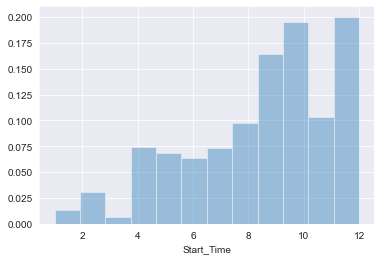

In [42]:
df_2019 = usa_data[usa_data.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month, bins = 12, norm_hist = True, kde = False)

##### Distribution of accidents by Month (data - 2018)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

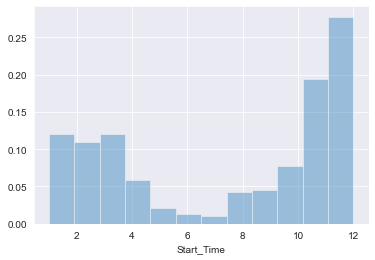

In [47]:
df_2018 = usa_data[usa_data.Start_Time.dt.year == 2018]
sns.distplot(df_2018.Start_Time.dt.month, bins = 12, norm_hist = True, kde = False)

##### Distribution of accidents by Month (data - 2018)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

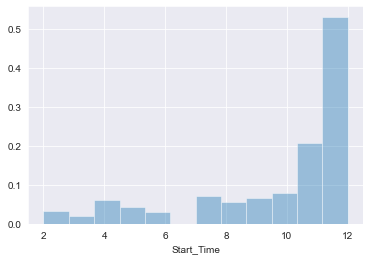

In [48]:
# some data is definately missing -------
df_2016 = usa_data[usa_data.Start_Time.dt.year == 2016]
sns.distplot(df_2016.Start_Time.dt.month, bins = 12, norm_hist = True, kde = False)

### Start Latitude & Longitude

##### plotting using 50% of the data

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

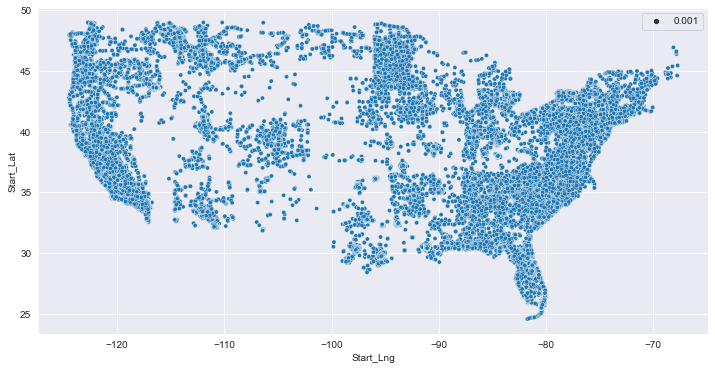

In [70]:
plt.figure(figsize=(12, 6))
sample_df = usa_data.sample(int(0.5 * len(usa_data)))
sns.scatterplot(x = sample_df.Start_Lng , y = sample_df.Start_Lat, palette = "muted", size = 0.001)

In [72]:
!pip install folium

In [80]:
lat, lon = usa_data.Start_Lat[42], usa_data.Start_Lng[42]
lat, lon

(40.45112, -85.15048)

In [107]:
#for x in usa_data[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    #print(x)

##### We need a list of pairs of Latitude & Longitude to plot a heatmap

In [88]:
zip(list(usa_data.Start_Lat), list(usa_data.Start_Lng))

##### Creating Sample Data - using 1% of data

In [156]:
sample_df = usa_data.sample(int(0.001 * len(usa_data)))
lat_lon_pairs = zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng))

In [157]:
import folium
from folium.plugins import HeatMap

In [158]:

HeatMap(lat_lon_pairs).add_to(map)
map

In [154]:
#import folium
#from folium.plugins import HeatMap

#m = folium.Map(location = [44, -65], zoom_start=6)
#data = lat_lon_pairs
#HeatMap(data).add_to(m)
#m.save("output.html")
#m

### Summary & Conclusion
#### - No data from New York
#### - Less than 2% of cities have more than 1000 yearly accidents.
#### - The number of accidents per city decreases exponentially
#### - Over 900 cities have reported just one accident
#### - A high Percentage of accidents occur between 2pm to 6pm
#### - On sundays peak occur between (12 am - 5 am) & (1 pm - 6 pm) unlike weekdays
#### - Some data is missing for 2016 & 2021